<a href="https://colab.research.google.com/github/MatheusRobles/Ex_Machine_Learn_I/blob/main/EX_Machine_Learn_Aula_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [15]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/MatheusRobles/Ex_Machine_Learn_I/main/breast_cancer.csv')

In [16]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

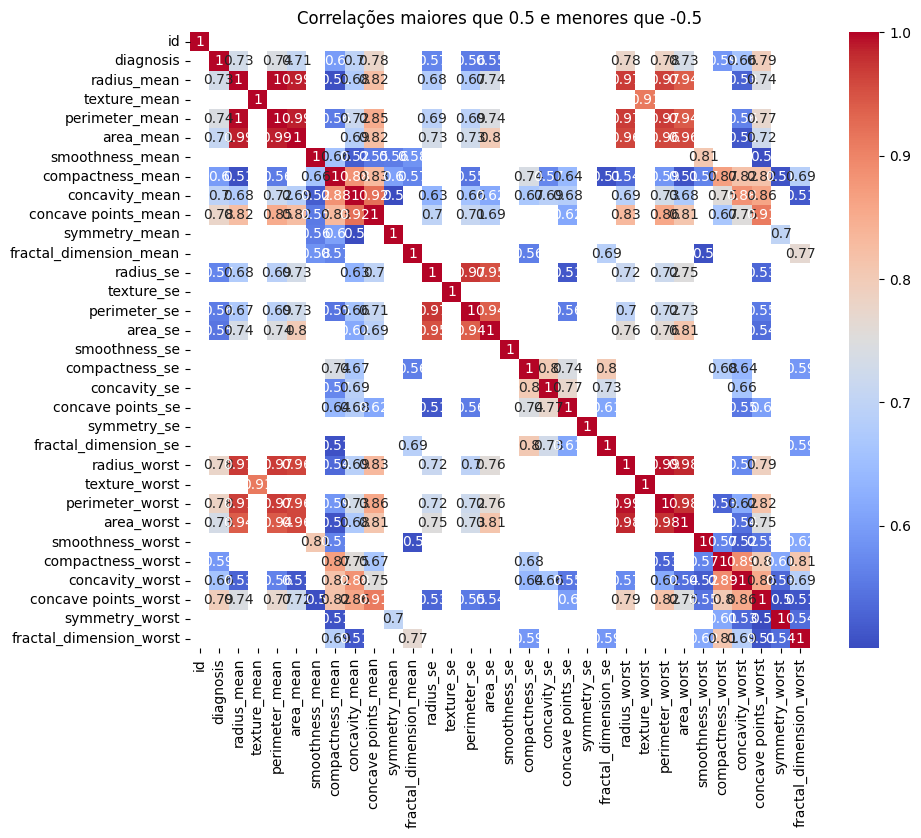

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Filtrar as correlações
filtered_corr = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm")
plt.title("Correlações maiores que 0.5 e menores que -0.5")
plt.show()

In [21]:
selected_columns = ["diagnosis",
    "radius_mean", "perimeter_mean", "area_mean", "compactness_mean", "concavity_mean",
    "concave points_mean", "radius_se", "perimeter_se", "area_se", "radius_worst",
    "perimeter_worst", "area_worst", "compactness_worst", "concavity_worst",
    "concave points_worst"
]

# Criar um novo DataFrame com as colunas selecionadas
df_selected = df.loc[:, selected_columns]
df_selected

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216
565,1,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418
567,1,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650


In [22]:
from sklearn.model_selection import train_test_split

X = df_selected.drop('diagnosis', axis=1)
y = df_selected['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



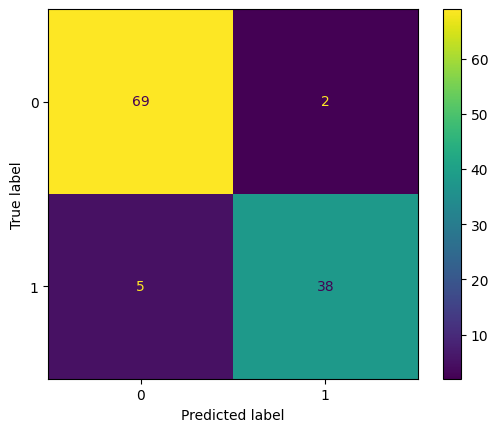

In [26]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [27]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression(max_iter=1000, random_state= 42)
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



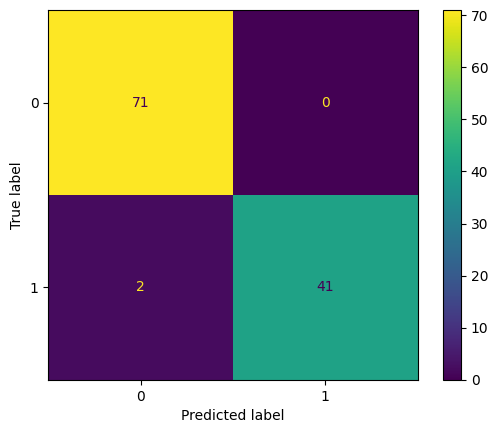

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt =  DecisionTreeClassifier(max_depth = 5, random_state=42)

model = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



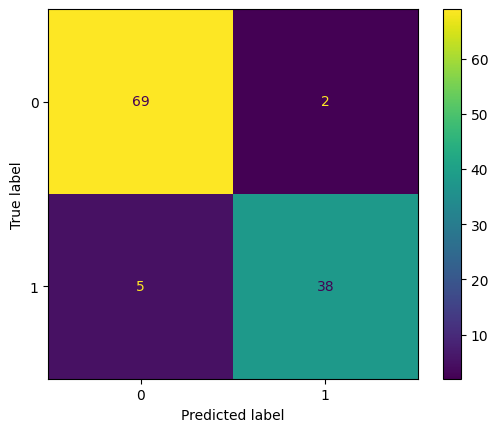

In [30]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

EX 2

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/MatheusRobles/Ex_Machine_Learn_I/main/faults.csv')


In [32]:
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [34]:
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [38]:
target_columns = df.iloc[:, -7:]
counts = target_columns.sum()
counts

Pastry          158
Z_Scratch       190
K_Scatch        391
Stains           72
Dirtiness        55
Bumps           402
Other_Faults    673
dtype: int64

In [39]:
df['Target'] = df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].idxmax(axis=1)

# 2. Separar os dados em recursos (features) e alvo (target)
X = df.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'Target'], axis=1)
y = df['Target']

In [40]:
y.value_counts(normalize=True)

Other_Faults    0.346728
Bumps           0.207110
K_Scatch        0.201443
Z_Scratch       0.097888
Pastry          0.081401
Stains          0.037094
Dirtiness       0.028336
Name: Target, dtype: float64

In [41]:
X_train, X_tests, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [42]:
dtc_base = DecisionTreeClassifier(random_state=42)
dtc_base.fit(X_train, y_train)

y_pred_base = dtc_base.predict(X_tests)

print(classification_report(y_test, y_pred_base))

              precision    recall  f1-score   support

       Bumps       0.59      0.58      0.59        81
   Dirtiness       0.64      0.82      0.72        11
    K_Scatch       0.95      0.95      0.95        78
Other_Faults       0.70      0.73      0.71       135
      Pastry       0.52      0.41      0.46        32
      Stains       0.80      0.86      0.83        14
   Z_Scratch       0.87      0.87      0.87        38

    accuracy                           0.74       389
   macro avg       0.72      0.74      0.73       389
weighted avg       0.73      0.74      0.73       389



In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

model = Pipeline([
    ("dtc", DecisionTreeClassifier())
])

param_grid = {
    'dtc__max_depth': [None, 5, 10],
    'dtc__min_samples_leaf': [1, 2, 5],
    'dtc__min_samples_split': [2, 5, 10],
    'dtc__criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('dtc', DecisionTreeClassifier())]),
             param_grid={'dtc__criterion': ['gini', 'entropy'],
                         'dtc__max_depth': [None, 5, 10],
                         'dtc__min_samples_leaf': [1, 2, 5],
                         'dtc__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [49]:
grid_search.best_params_

{'dtc__criterion': 'gini',
 'dtc__max_depth': 10,
 'dtc__min_samples_leaf': 1,
 'dtc__min_samples_split': 2}

In [50]:
y_pred = grid_search.predict(X_tests)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.60      0.74      0.66        81
   Dirtiness       0.73      0.73      0.73        11
    K_Scatch       0.96      0.94      0.95        78
Other_Faults       0.74      0.66      0.70       135
      Pastry       0.47      0.47      0.47        32
      Stains       0.86      0.86      0.86        14
   Z_Scratch       0.97      0.89      0.93        38

    accuracy                           0.75       389
   macro avg       0.76      0.75      0.76       389
weighted avg       0.76      0.75      0.75       389



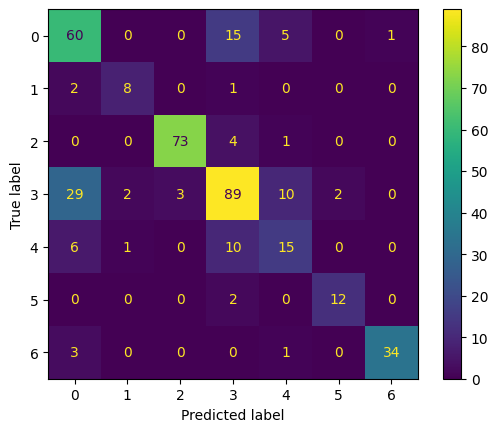

In [52]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [55]:
from sklearn.tree import plot_tree
modelo = grid_search.best_estimator_["dtc"]
nome_das_variaveis = X_train.columns
nome_das_classes = y_train.unique().astype(str)

plt.figure(figsize=(50,50), dpi=300)

plot_tree(modelo, feature_names=nome_das_variaveis, class_names=modelo.classes_, filled=True)
plt.savefig("arvore_exercicio_3.png")
plt.close()

[(0.0, 0.2)]

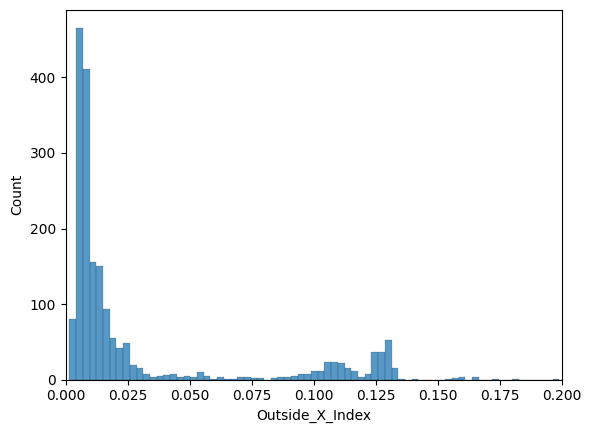

In [56]:
fig = sns.histplot(data=df, x="Outside_X_Index")
fig.set(xlim=(0,0.2))

[(0.0, 400.0)]

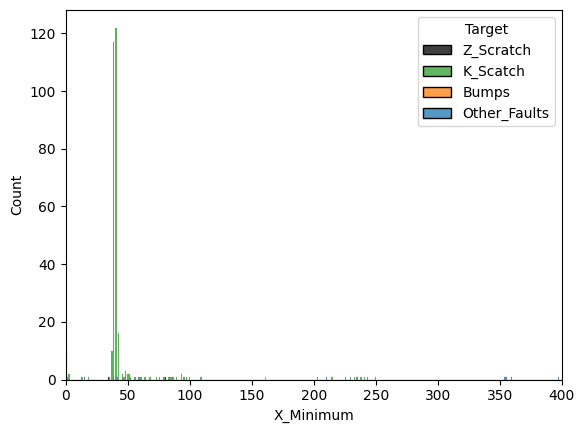

In [58]:
palette ={"Other_Faults": "C0", "Bumps": "C1", "K_Scatch": "C2", "Z_Scratch": "k", "Pastry": "C3", "Stains": "C4", "Dirtiness": "C5"}

df_node = df[(df["Outside_X_Index"]>0.055)]

fig = sns.histplot(data=df_node, x="X_Minimum", hue="Target", multiple="stack", palette= palette)
fig.set(xlim=(0,400))

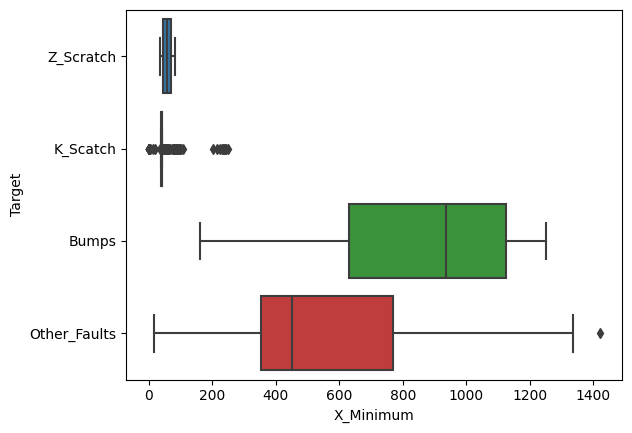

In [60]:
fig = sns.boxplot(data=df_node, x="X_Minimum", y="Target")

<Axes: xlabel='Steel_Plate_Thickness', ylabel='Count'>

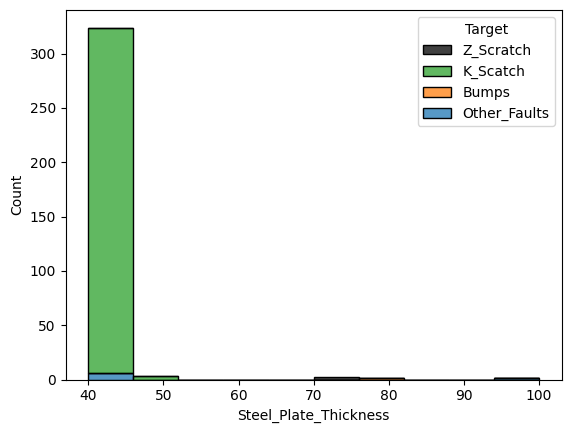

In [61]:
df_node_2 = df[(df['Outside_X_Index']>0.055) & (df['X_Minimum']<=302)]

sns.histplot(data=df_node_2, x="Steel_Plate_Thickness", hue="Target",  multiple="stack", palette=palette)

[(0.0, 0.2)]

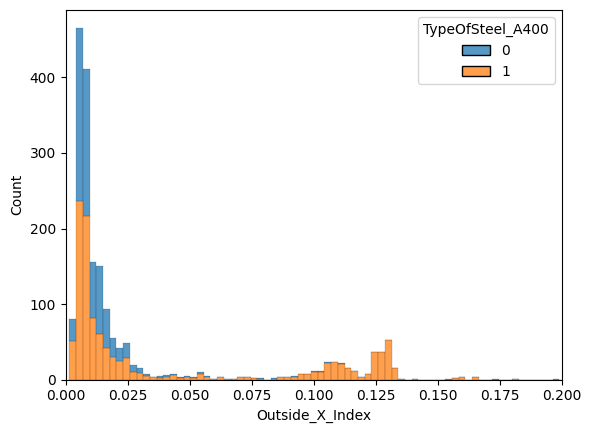

In [62]:
fig = sns.histplot(data=df, x="Outside_X_Index", hue='TypeOfSteel_A400',  multiple="stack")
fig.set(xlim=(0, 0.2))

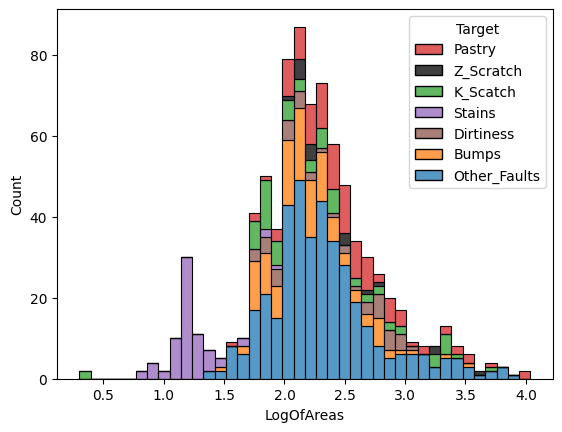

In [64]:
df_node_2 = df[(df['Outside_X_Index']<=0.055) & (df['TypeOfSteel_A400']>0.5)]

fig = sns.histplot(data=df_node_2, x="LogOfAreas", hue="Target",  multiple="stack", bins=40, palette=palette)

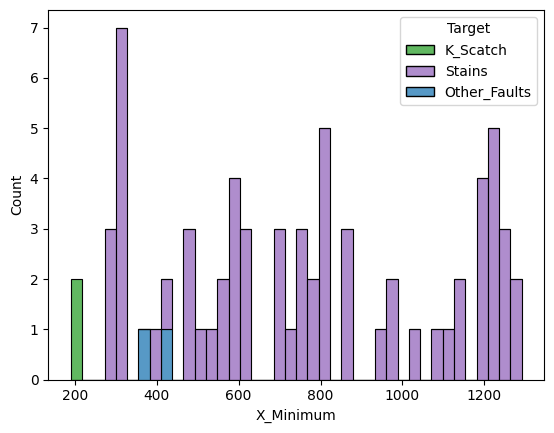

In [65]:
df_node_3 = df[(df['Outside_X_Index']<=0.055) & (df['TypeOfSteel_A400']>0.5) & (df['LogOfAreas']<=1.455)]

fig = sns.histplot(data=df_node_3, x="X_Minimum", hue="Target",  multiple="stack", bins=40, palette=palette)